<h1>Tables des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OBTENIR-LE-DATASET" data-toc-modified-id="OBTENIR-LE-DATASET-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OBTENIR LE DATASET</a></span></li><li><span><a href="#EXPLORATION-DES-DONNÉES" data-toc-modified-id="EXPLORATION-DES-DONNÉES-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EXPLORATION DES DONNÉES</a></span></li><li><span><a href="#PRE-TRAITEMENT-DES-DONNÉES" data-toc-modified-id="PRE-TRAITEMENT-DES-DONNÉES-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PRE-TRAITEMENT DES DONNÉES</a></span></li><li><span><a href="#MATRICE-DE-CORRELATION-ET-DE-PERSON" data-toc-modified-id="MATRICE-DE-CORRELATION-ET-DE-PERSON-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MATRICE DE CORRELATION ET DE PERSON</a></span></li><li><span><a href="#DEFINIR-LES-FEATURES" data-toc-modified-id="DEFINIR-LES-FEATURES-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DEFINIR LES FEATURES</a></span></li><li><span><a href="#SEPARER-LE-DATASET-EN-TRAIN-ET-TEST" data-toc-modified-id="SEPARER-LE-DATASET-EN-TRAIN-ET-TEST-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SEPARER LE DATASET EN TRAIN ET TEST</a></span></li><li><span><a href="#FAIRE-APPRENDRE-LE-MODELE" data-toc-modified-id="FAIRE-APPRENDRE-LE-MODELE-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>FAIRE APPRENDRE LE MODELE</a></span></li><li><span><a href="#EVALUATION-SUR-LE-TRAIN" data-toc-modified-id="EVALUATION-SUR-LE-TRAIN-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>EVALUATION SUR LE TRAIN</a></span></li><li><span><a href="#EVALUATION-SUR-LE-TEST" data-toc-modified-id="EVALUATION-SUR-LE-TEST-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>EVALUATION SUR LE TEST</a></span></li><li><span><a href="#PREDICTION-SUR-UNE-OBSERVATION" data-toc-modified-id="PREDICTION-SUR-UNE-OBSERVATION-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>PREDICTION SUR UNE OBSERVATION</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# OBTENIR LE DATASET

In [3]:
df = pd.read_csv('pointure.data')
df

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15
5,féminin,168,68.0,20
6,féminin,165,59.0,18
7,féminin,175,68.0,23


# EXPLORATION DES DONNÉES

In [4]:
df.columns

Index(['Genre', 'Taille(cm)', 'Poids(kg)', 'Pointure(cm)'], dtype='object')

In [5]:
df.shape

(8, 4)

In [6]:
df.head()

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15


In [7]:
df.describe()

,Taille(cm),Poids(kg),Pointure(cm)
count,8.000000,8.000000,8.000000
mean,171.500000,70.012500,23.625000
std,10.028531,13.118192,5.629958
min,152.000000,45.400000,15.000000
25%,167.250000,65.750000,19.500000
50%,172.500000,71.400000,24.000000
75%,180.000000,78.225000,28.500000
max,182.000000,86.200000,30.000000


# PRE-TRAITEMENT DES DONNÉES

In [8]:
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['masculin','féminin']
label_encoder.fit(input_classes)

# transformer un ensemble de classes
encoded_labels = label_encoder.transform(df['Genre'])
print(encoded_labels)
df['Genre'] = encoded_labels

df

[1 1 1 1 0 0 0 0]


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,1,182,81.6,30
1,1,180,86.2,28
2,1,170,77.1,30
3,1,180,74.8,25
4,0,152,45.4,15
5,0,168,68.0,20
6,0,165,59.0,18
7,0,175,68.0,23


# MATRICE DE CORRELATION 

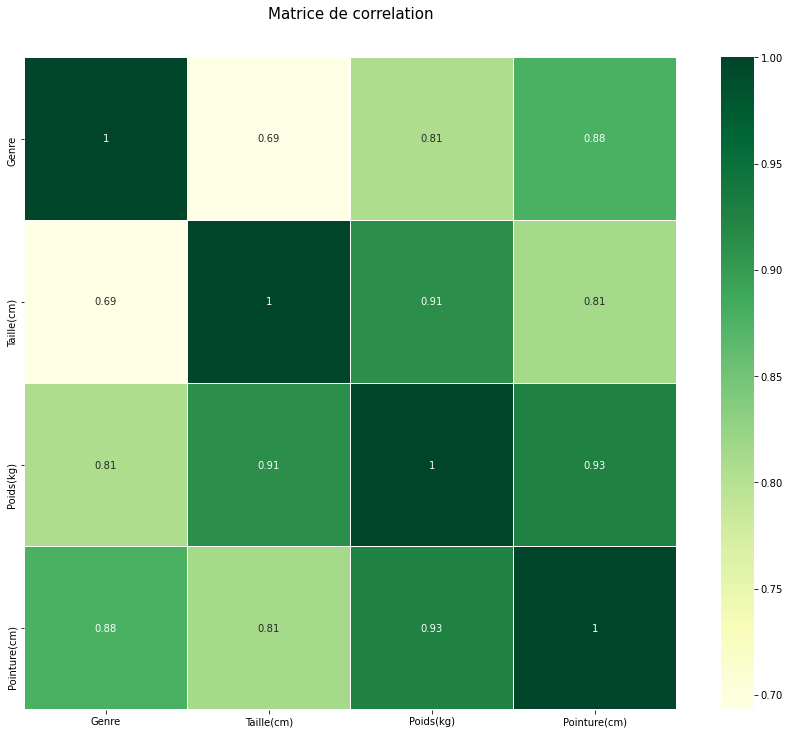

In [9]:
corr = df.corr().round(3)
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Matrice de correlation', y=1.05, size=15)
plt.show()

# Definir les features


In [10]:
X = df.iloc[:, lambda df: [1, 2, 3]]
y = df.iloc[:, 0]

# Separer en train et test

In [11]:
from sklearn.model_selection import train_test_split

#decomposer les donnees predicteurs en training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [12]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 3) (2, 3) (6,) (2,)


# Apprentissage du modele

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# Evaluation sur le training data

In [14]:
y_naive_bayes1 = gnb.predict(X_train)
print("Number of mislabeled points out of a total {} points : {}".format(X_train.shape[0],(y_train != y_naive_bayes1).sum()))

Number of mislabeled points out of a total 6 points : 0


In [15]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, y_naive_bayes1)
print("Accuracy du modele Naive Bayes predit: " + str(accuracy))


recall_score = metrics.recall_score(y_train, y_naive_bayes1)
print("recall score du modele Naive Bayes predit:{} ".format(recall_score))

f1_score = metrics.f1_score(y_train, y_naive_bayes1)
print("F1 score du modele Naive Bayes predit:{} ".format(f1_score))

Accuracy du modele Naive Bayes predit: 1.0
recall score du modele Naive Bayes predit:1.0 
F1 score du modele Naive Bayes predit:1.0 


# Evaluation sur le test data

In [16]:
y_naive_bayes2 = gnb.predict(X_test)

print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0],(y_test != y_naive_bayes2).sum()))

recall_score = metrics.recall_score(y_test, y_naive_bayes2)
print("recall score du modele Naive Bayes predit:{} " .format(recall_score))

f1_score = metrics.f1_score(y_test, y_naive_bayes2)
print("F1 score du modele Naive Bayes predit:{} " .format(f1_score))

Number of mislabeled points out of a total 2 points : 1
recall score du modele Naive Bayes predit:0.0 
F1 score du modele Naive Bayes predit:0.0 


# Prediction sur une observation

In [29]:
donnee = {'Taille(cm)':[183], 'Poids(kg)':[59], 'Pointure(cm)':[20]}
dfToPredict = pd.DataFrame(data=donnee) 
dfToPredict

,Taille(cm),Poids(kg),Pointure(cm)
0,183,59,20


In [30]:
yPredict = gnb.predict(dfToPredict)
print('La classe predite est : ', yPredict)
print('La classe predite est : ', 'masculin' if yPredict else 'feminin')

La classe predite est :  [0]
La classe predite est :  feminin


In [31]:
# exemple personnel----------------- rst non pertinent-----------------------?????????????

In [36]:
donnee = {'Taille(cm)':[199], 'Poids(kg)':[89], 'Pointure(cm)':[70]}
dfToPredict = pd.DataFrame(data=donnee) 
dfToPredict

,Taille(cm),Poids(kg),Pointure(cm)
0,199,89,70


In [37]:
yPredict = gnb.predict(dfToPredict)
print('La classe predite est : ', yPredict)
print('La classe predite est : ', 'masculin' if yPredict else 'feminin')

La classe predite est :  [0]
La classe predite est :  feminin
